##### Main task
Ми хочемо зрозуміти, як користувачі з різних країн поводяться з часом:
– хто краще утримується \
– хто приносить більше цінності \
– де є проблеми продукту або локалізації 

Для цього треба:
> 1. Підготувати данні: очистка + створити InvoiceMonth
> 2. Визначити місяць входу користувача 
> 3. Обираємо топ країни
> 4. Рахуємо користувачів 
> 5. Рахуємо retention 
> 6. Будуємо heatmap

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Online Retail.xlsx') # !! треба змінити на свій шлях !!

In [5]:
# Data Cleaning 
df.drop_duplicates(inplace=True)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['CustomerID'].notnull())]

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
import datetime as dt

In [40]:
# Створити InvoiceMonth
# you code 
# df["InvoiceDate"] =  # use pd.t_datetime -та обрати колонку 
# df["InvoiceMonth"] = # use df['обрати колонку'].dt.to_period("M").dt.to_timestamp()
# df["InvoiceDate"] =  df.t_datetime('InvoiceDate') 
# df["InvoiceMonth"] = # use df['обрати колонку'].dt.to_period("M").dt.to_timestamp()

# Cohort Analysis
def get_month(x): return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)



In [41]:
# Створити CohortMonth
# df["CohortMonth"] = (
#    # you code
#    df.# groupby("обрати колонку")["обрати колонку"]
#     df.groupby("CustomerID")["InvoiceDate"]
#       .transform("min") # щоб отримати одного розміру мін по даті для кожного запису
#       .dt.to_period("M").dt.to_timestamp()
# )
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [42]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [43]:
# Формування час використання 
year_diff = df["InvoiceMonth"].dt.year - df["CohortMonth"].dt.year
month_diff = df["InvoiceMonth"].dt.month - df["CohortMonth"].dt.month

df["CohortIndex"] = year_diff * 12 + month_diff + 1


In [45]:
# Обираємо топ країни
# top_countries = (
#     # you code
# )
top_countries = df['Country'].value_counts().head(5).index
df_geo = df[df["Country"].isin(top_countries)]


In [46]:
df_geo['Country'].value_counts()

Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64

In [29]:
cohort_counts_geo = pd.pivot_table( # щоб створити зведену таблицю
        df_geo,
        # index = [], # обрати індекси
        # columns = "", # обрати колонку
        # values = "", # обрати значення 
        index=["Country", "CohortMonth"],
        columns='CohortIndex',
        values='CustomerID',
        aggfunc="nunique" # aggregation
    
)

In [30]:
# Рахуємо retention
cohort_sizes_geo = cohort_counts_geo.iloc[:, 0]
cohort_sizes_geo
retention_geo = cohort_counts_geo.divide(cohort_sizes_geo, axis=0)


In [47]:
retention_geo

CohortIndex                  1         2         3         4         5   \
Country        CohortMonth                                                
EIRE           2010-12-01   1.0  0.666667  0.666667  1.000000  0.666667   
France         2010-12-01   1.0  0.466667  0.400000  0.466667  0.333333   
               2011-01-01   1.0  0.294118  0.352941  0.235294  0.235294   
               2011-02-01   1.0       NaN       NaN  0.500000  0.333333   
               2011-03-01   1.0  0.250000  0.250000       NaN  0.250000   
               2011-04-01   1.0  0.500000       NaN       NaN  0.250000   
               2011-05-01   1.0  0.400000  0.100000  0.300000  0.300000   
               2011-06-01   1.0       NaN  0.200000  0.600000       NaN   
               2011-07-01   1.0  0.333333  0.333333       NaN  0.333333   
               2011-08-01   1.0  0.200000  0.200000  0.200000  0.200000   
               2011-09-01   1.0  0.500000  0.666667       NaN       NaN   
               2011-10-01   1.0  0.200000  0.400000       NaN       NaN   
               2011-11-01   1.0       NaN       NaN       NaN       NaN   
               2011-12-01   1.0       NaN       NaN       NaN       NaN   
Germany        2010-12-01   1.0  0.500000  0.388889  0.666667  0.611111   
               2011-01-01   1.0  0.315789  0.368421  0.052632  0.315789   
               2011-02-01   1.0       NaN  0.250000  0.500000       NaN   
               2011-03-01   1.0  0.200000  0.400000       NaN  0.400000   
               2011-04-01   1.0  0.200000  0.400000  0.200000  0.200000   
               2011-05-01   1.0       NaN  0.200000  0.200000  0.400000   
               2011-06-01   1.0       NaN  0.666667  0.666667  0.333333   
               2011-07-01   1.0  0.285714  0.571429  0.285714  0.142857   
               2011-08-01   1.0  0.166667  0.666667  0.333333  0.166667   
               2011-09-01   1.0  0.166667  0.166667  0.166667       NaN   
               2011-10-01   1.0  0.444444  0.222222       NaN       NaN   
               2011-11-01   1.0       NaN       NaN       NaN       NaN   
               2011-12-01   1.0       NaN       NaN       NaN       NaN   
Spain          2010-12-01   1.0  0.750000  0.250000  0.500000  0.250000   
               2011-01-01   1.0       NaN  0.250000       NaN       NaN   
               2011-02-01   1.0  0.333333       NaN  0.333333  0.333333   
               2011-03-01   1.0       NaN  0.250000  0.500000       NaN   
               2011-04-01   1.0       NaN       NaN       NaN       NaN   
               2011-06-01   1.0  0.500000       NaN       NaN       NaN   
               2011-07-01   1.0       NaN       NaN  1.000000       NaN   
               2011-09-01   1.0  0.500000       NaN       NaN       NaN   
               2011-10-01   1.0       NaN       NaN       NaN       NaN   
               2011-11-01   1.0       NaN       NaN       NaN       NaN   
               2011-12-01   1.0       NaN       NaN       NaN       NaN   
United Kingdom 2010-12-01   1.0  0.354601  0.322699  0.373006  0.359509   
               2011-01-01   1.0  0.212291  0.259777  0.234637  0.332402   
               2011-02-01   1.0  0.188235  0.194118  0.285294  0.288235   
               2011-03-01   1.0  0.152745  0.260143  0.198091  0.224344   
               2011-04-01   1.0  0.209386  0.202166  0.216606  0.202166   
               2011-05-01   1.0  0.187500  0.171875  0.171875  0.207031   
               2011-06-01   1.0  0.177570  0.144860  0.238318  0.238318   
               2011-07-01   1.0  0.177515  0.195266  0.230769  0.278107   
               2011-08-01   1.0  0.226950  0.226950  0.241135  0.120567   
               2011-09-01   1.0  0.228261  0.300725  0.115942       NaN   
               2011-10-01   1.0  0.243827  0.111111       NaN       NaN   
               2011-11-01   1.0  0.117845       NaN       NaN       NaN   
               2011-12-01   1.0       NaN       NaN       NaN       NaN   

CohortIndex             

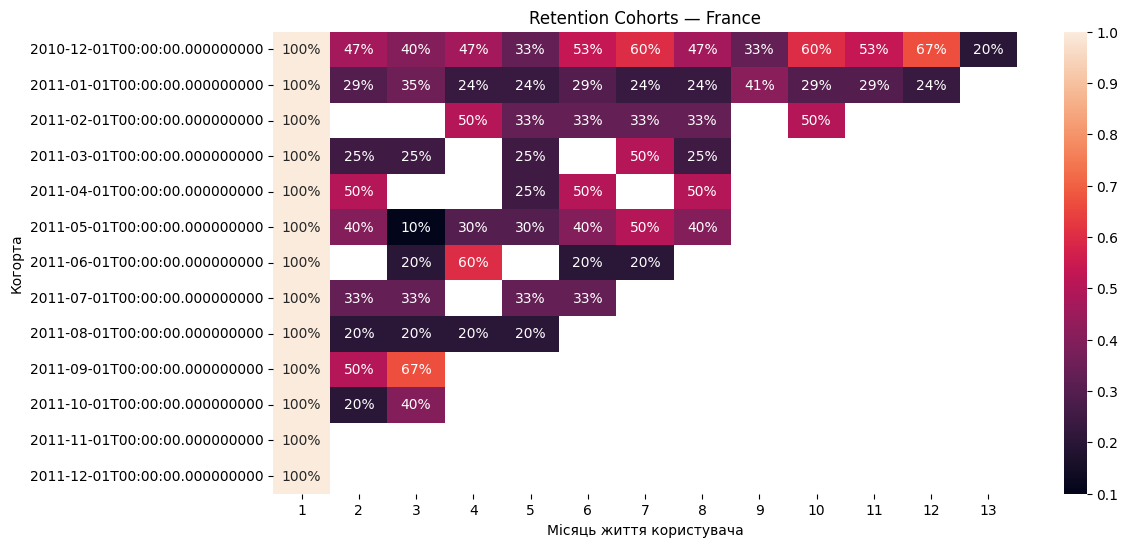

In [50]:
# Будуємо heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_geo.loc["France"],
    annot=True,
    fmt=".0%",

)
plt.title("Retention Cohorts — France")
plt.xlabel("Місяць життя користувача")
plt.ylabel("Когорта")
plt.show()


United Kingdom	Найнижчий старт: Retention на 2-й місяць складає лише 12–24%. Це свідчить про велику кількість "випадкових" клієнтів.	Найвищий миттєвий відтік: Понад 75% нових клієнтів не повертаються після першої покупки.

Germany	Найвища лояльність: Показники утримання на 2-й місяць часто сягають 30–50%. Ранні когорти (2010-12) тримаються стабільно понад 10 місяців.	Низький відтік: Клієнти з Німеччини демонструють найбільш прогнозовану та стабільну поведінку.

France	Висока мінливість: Показники "стрибають" від 10% до 67%. Це вказує на сильну залежність від зовнішніх факторів . Середній відтік: Клієнти повертаються нерегулярно; існують періоди масового повернення "старих" когорт.

In [53]:
df[df['Country'] == 'United Kingdom']['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     1929
JUMBO BAG RED RETROSPOT                1461
REGENCY CAKESTAND 3 TIER               1417
ASSORTED COLOUR BIRD ORNAMENT          1320
PARTY BUNTING                          1300
                                       ... 
POTTING SHED SOW 'N' GROW SET             1
IVORY PENDANT TRIPLE SHELL NECKLACE       1
16 PC CUTLERY SET PANTRY DESIGN           1
CAPIZ CHANDELIER                          1
SET OF 3 MINI HANGING PORTRAITS           1
Name: count, Length: 3844, dtype: int64

In [ ]:
#  Revenue/LTV
# revenue_geo = pd.pivot_table(
#     df_geo,
#     index=["Country", "CohortMonth"],
#     columns="CohortIndex",
#     values="Revenue",
#     aggfunc="sum"
# )
# revenue_geo

In [37]:
# ARPU
# arpu_geo = revenue_geo.divide(cohort_counts_geo, axis=0)
# arpu_geo

In [38]:
# LTV
# ltv_geo = arpu_geo.cumsum(axis=1)
# ltv_geo